In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import ffmpeg
from IPython.display import Latex

plt.rcParams['text.usetex'] = True

In [3]:
moviepath = os.path.join(os.getcwd(), 'data', "3_dynamic_gtg", "movies")
figpath = os.path.join(os.getcwd(), 'data', "3_dynamic_gtg", "figs", "temp")
datapath = os.path.join(os.getcwd(), 'data', "3_dynamic_gtg", "data")

w_min = 1e-17

In [97]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

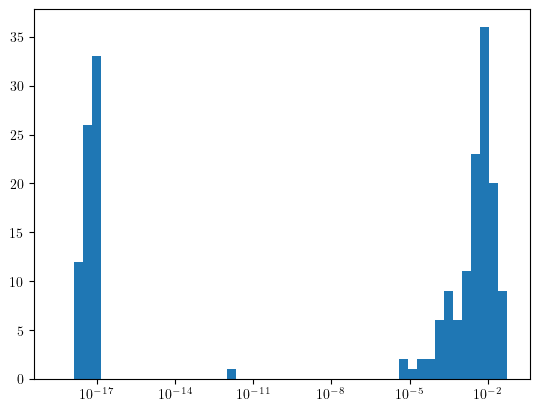

In [109]:
f = 0.2
a = np.load(os.path.join(datapath, 'w_f={:.2f}_mul_fix.npy'.format(f)))

#print('<w> = {:.4f}'.format(200*np.mean(a)))
#plot_loghist(a, 80)
plot_loghist(a, bins=50)
plt.show();

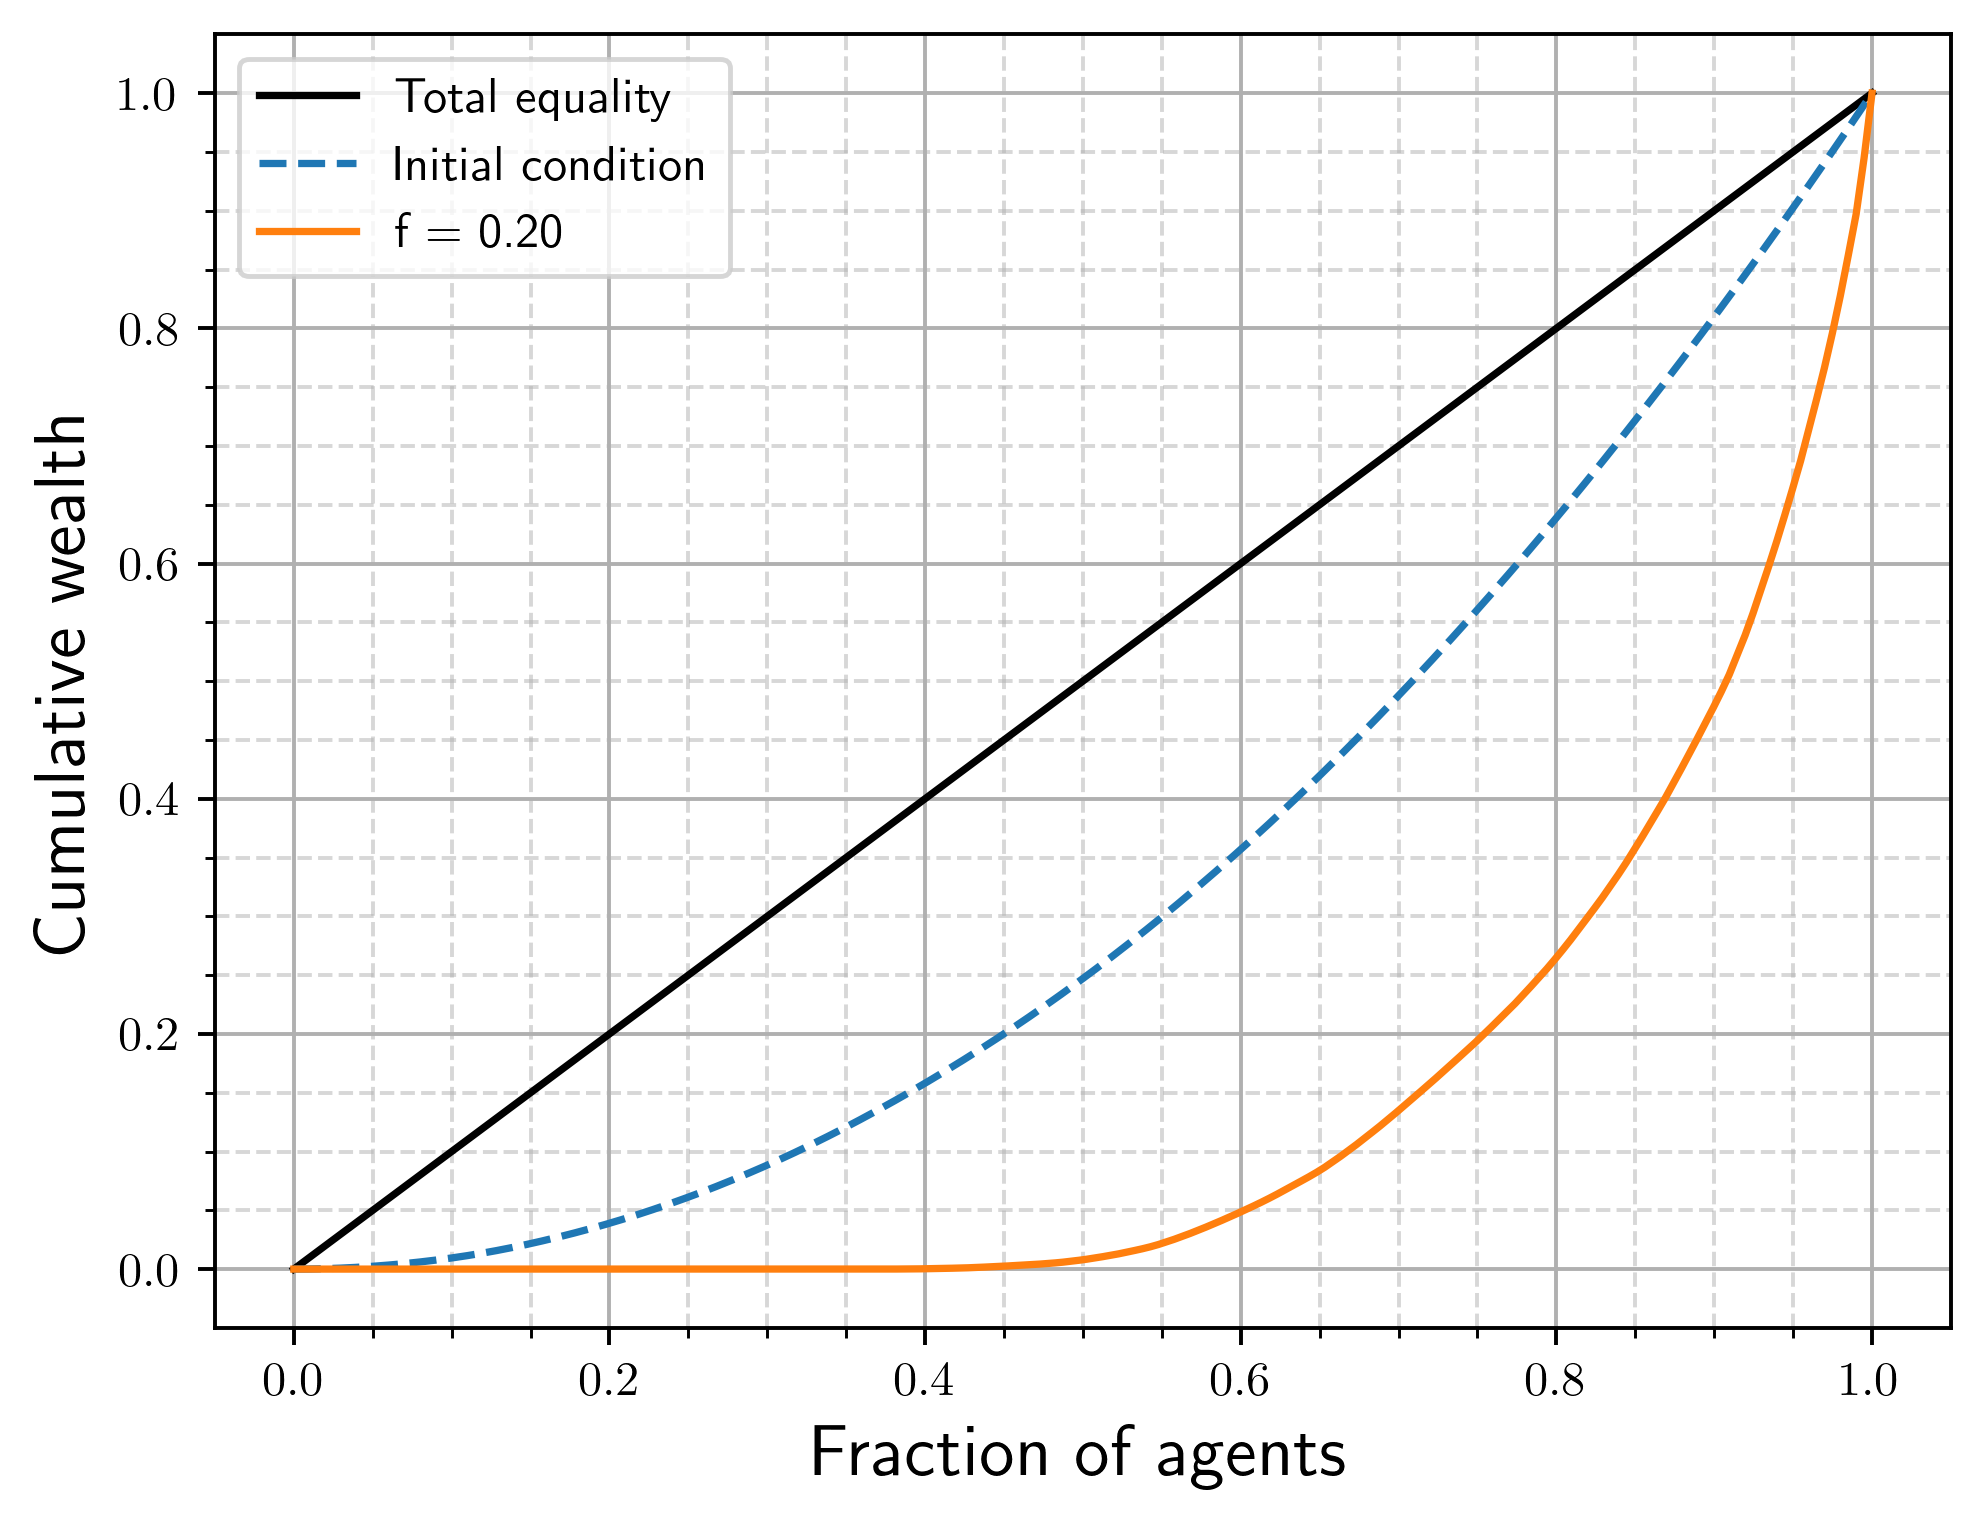

In [110]:
# Lorenz Curve
#f_set = [0, .05, .1, .2, .3, .4, .5]

fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_ylabel('Cumulative wealth', size=15)
ax.set_xlabel('Fraction of agents', size=15)
ax.set_xticks(np.arange(0, 1.05, .05), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
# Plot gini=0 curve
ax.plot([0,1], [0,1], color='k', label='Total equality')
# Plot uniform distribution curve
agent = np.random.rand(10000)
# Normalize wealth
agent /= np.sum(agent)
agent = np.sort(agent)

ax.plot(np.linspace(0, 1, agent.shape[0]), np.cumsum(agent)/np.sum(agent), 
        label='Initial condition'.format(f), linestyle='--')

agent = np.sort(a)

ax.plot(np.linspace(0, 1, agent.shape[0]), np.cumsum(agent)/np.sum(agent), 
        label='f = {:.2f}'.format(f))
ax.legend()
ax.grid(which='minor', alpha=.5, linestyle='--')
ax.grid(which='major', alpha=1, linestyle='-')

#path_agents = os.path.join(filepath, 'f={:.2f}_agents.npy'.format(f))

plt.show()

#fig.savefig(os.path.join(figpath, 'lorenz_curve'), format='png')